In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('Data Files//tmdb.csv', index_col=0)

In [5]:
df.head()

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,title,vote_count,Profit
0,237000000,Action Adventure Fantasy Science Fiction,culture clash future space war space col...,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners Twentieth Century Fo...,US United States of America GB United Kingdom,2009-12-10,2787965087,162.0,Enter the World of Pandora.,Avatar,11800,2550965087
1,300000000,Adventure Fantasy Action,ocean drug abuse exotic island east indi...,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures Jerry Bruckheimer Films...,US United States of America,2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,4500,661000000
2,245000000,Action Adventure Crime,spy based on novel secret agent sequel ...,en,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures Danjaq B,GB United Kingdom US United States of America,2015-10-26,880674609,148.0,A Plan No One Escapes,Spectre,4466,635674609
3,250000000,Action Crime Drama Thriller,dc comics crime fighter terrorist secret...,en,Following the death of District Attorney Harve...,112.312950,Legendary Pictures Warner Bros DC Entertai...,US United States of America,2012-07-16,1084939099,165.0,The Legend Ends,The Dark Knight Rises,9106,834939099
4,260000000,Action Adventure Science Fiction,based on novel mars medallion space trav...,en,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,US United States of America,2012-03-07,284139100,132.0,"Lost in our world, found in another.",John Carter,2124,24139100


In [16]:
df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True)

### Let's group the column into categorical and numerical column

In [17]:
cat_cols = df.select_dtypes(exclude=[np.number])
num_cols = df.select_dtypes(include=[np.number])

In [18]:
cat_cols

,genres,keywords,original_language,overview,production_companies,production_countries,release_date,tagline,title
0,Action Adventure Fantasy Science Fiction,culture clash future space war space col...,en,"In the 22nd century, a paraplegic Marine is di...",Ingenious Film Partners Twentieth Century Fo...,US United States of America GB United Kingdom,2009-12-10,Enter the World of Pandora.,Avatar
1,Adventure Fantasy Action,ocean drug abuse exotic island east indi...,en,"Captain Barbossa, long believed to be dead, ha...",Walt Disney Pictures Jerry Bruckheimer Films...,US United States of America,2007-05-19,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End
2,Action Adventure Crime,spy based on novel secret agent sequel ...,en,A cryptic message from Bond’s past sends him o...,Columbia Pictures Danjaq B,GB United Kingdom US United States of America,2015-10-26,A Plan No One Escapes,Spectre
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret...,en,Following the death of District Attorney Harve...,Legendary Pictures Warner Bros DC Entertai...,US United States of America,2012-07-16,The Legend Ends,The Dark Knight Rises
4,Action Adventure Science Fiction,based on novel mars medallion space trav...,en,"John Carter is a war-weary, former military ca...",Walt Disney Pictures,US United States of America,2012-03-07,"Lost in our world, found in another.",John Carter
...,...,...,...,...,...,...,...,...,...
4798,Action Crime Thriller,united states u mexico barrier legs arms ...,es,El Mariachi just wants to play his guitar and ...,Columbia Pictures,MX Mexico US United States of America,1992-09-04,"He didn't come looking for trouble, but troubl...",El Mariachi
4799,Comedy Romance,NaN,en,A newlywed couple's honeymoon is upended by th...,NaN,NaN,2011-12-26,A newlywed couple's honeymoon is upended by th...,Newlyweds
4800,Comedy Drama Romance TV Movie,date love at first sight narration inves...,en,"""Signed, Sealed, Delivered"" introduces a dedic...",Front Street Pictures Muse Entertainment Ent...,US United States of America,2013-10-13,No Tagline,"Signed, Sealed, Delivered"
4801,NaN,NaN,en,When ambitious New York attorney Sam is sent t...,NaN,US United States of America CN China,2012-05-03,A New Yorker in Shanghai,Shanghai Calling


In [19]:
# There's still some Na. lets clean that 
cat_cols.isna().sum()

genres                   27
keywords                410
original_language         0
overview                  0
production_companies    349
production_countries    172
release_date              1
tagline                   0
title                     0
dtype: int64

In [23]:
cat_cols['keywords'].fillna('UnSpecified', inplace=True)
cat_cols['genres'].fillna('UnSpecified', inplace=True)
cat_cols['production_companies'].fillna('UnSpecified', inplace=True)
cat_cols['production_countries'].fillna('UnSpecified', inplace=True)
cat_cols['keywords'].fillna(method='bfill', inplace=True)

In [26]:
num_cols

,budget,popularity,revenue,runtime,vote_count,Profit
0,237000000,150.437577,2787965087,162.0,11800,2550965087
1,300000000,139.082615,961000000,169.0,4500,661000000
2,245000000,107.376788,880674609,148.0,4466,635674609
3,250000000,112.312950,1084939099,165.0,9106,834939099
4,260000000,43.926995,284139100,132.0,2124,24139100
...,...,...,...,...,...,...
4798,220000,14.269792,2040920,81.0,238,1820920
4799,9000,0.642552,0,85.0,5,-9000
4800,0,1.444476,0,120.0,6,0
4801,0,0.857008,0,98.0,7,0


In [27]:
num_cols.isna().sum()

budget        0
popularity    0
revenue       0
runtime       0
vote_count    0
Profit        0
dtype: int64

Bar Chart for genres column


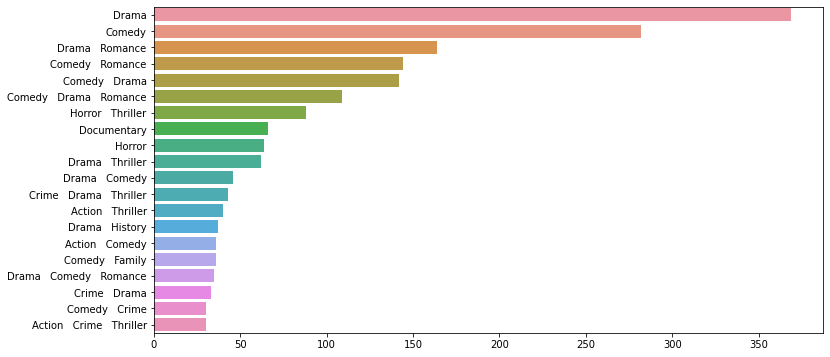

Bar Chart for keywords column


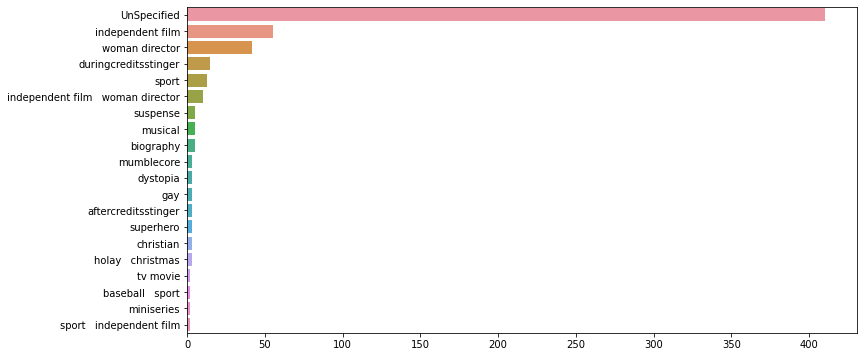

Bar Chart for original_language column


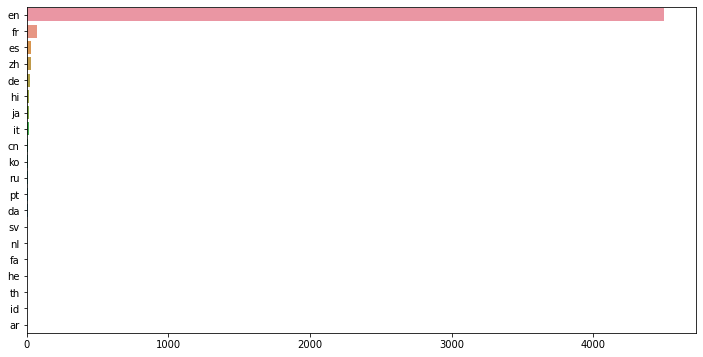

Bar Chart for production_companies column


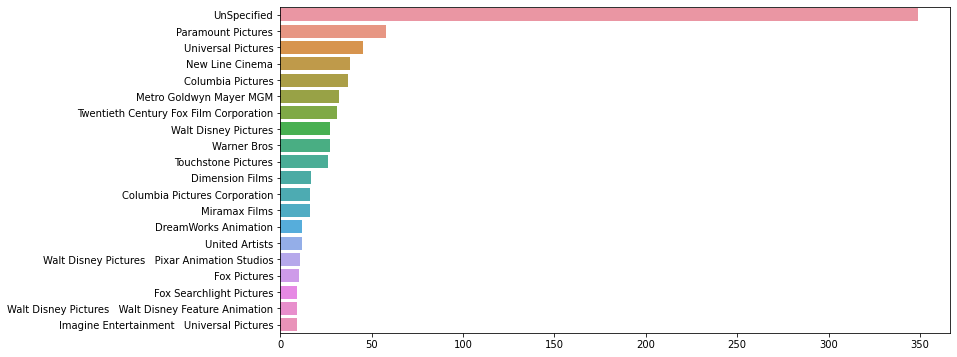

Bar Chart for production_countries column


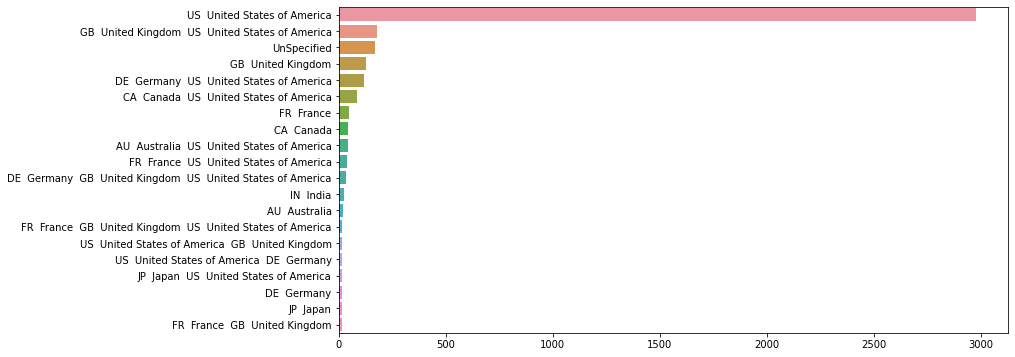

In [37]:
for col in cat_cols[['genres', 'keywords', 'original_language', 'production_companies', 'production_countries']].columns:
    val_cnt = cat_cols[col].value_counts()[:20]
    print(f'Bar Chart for {col} column')
    plt.figure(figsize=(12,6))
    sns.barplot(x=val_cnt.values, y=val_cnt.index)
    plt.show()

Bar Chart for budget column


<Figure size 864x432 with 0 Axes>

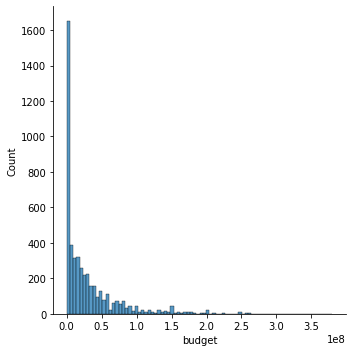

Bar Chart for popularity column


<Figure size 864x432 with 0 Axes>

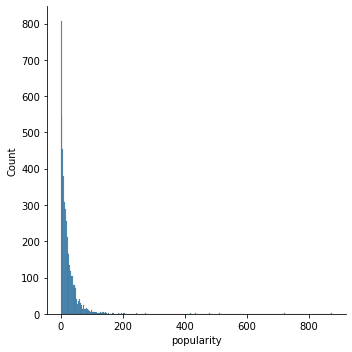

Bar Chart for revenue column


<Figure size 864x432 with 0 Axes>

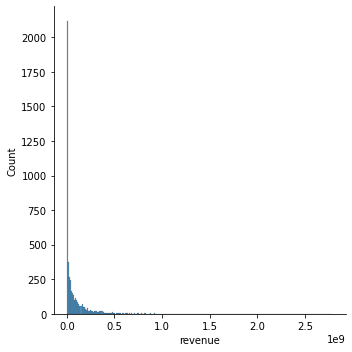

Bar Chart for runtime column


<Figure size 864x432 with 0 Axes>

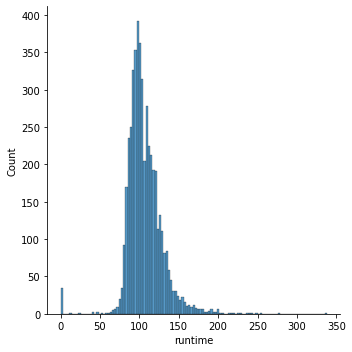

Bar Chart for vote_count column


<Figure size 864x432 with 0 Axes>

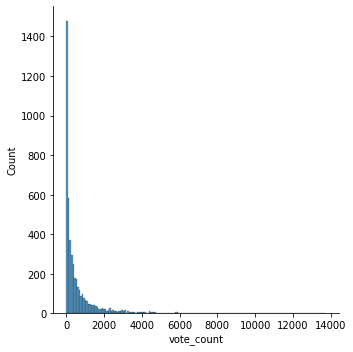

Bar Chart for Profit column


<Figure size 864x432 with 0 Axes>

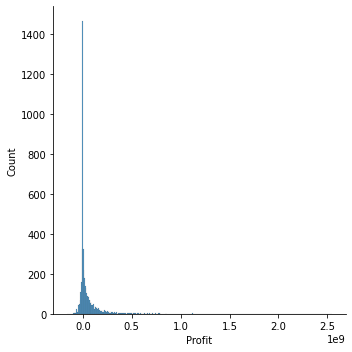

In [43]:
for col in num_cols.columns:
    val_cnt = num_cols[col].value_counts()
    print(f'Histogram Chart for {col} column')
    plt.figure(figsize=(12,6))
    sns.displot(x=num_cols[col]);
    plt.show();

Boxplot Chart for budget column


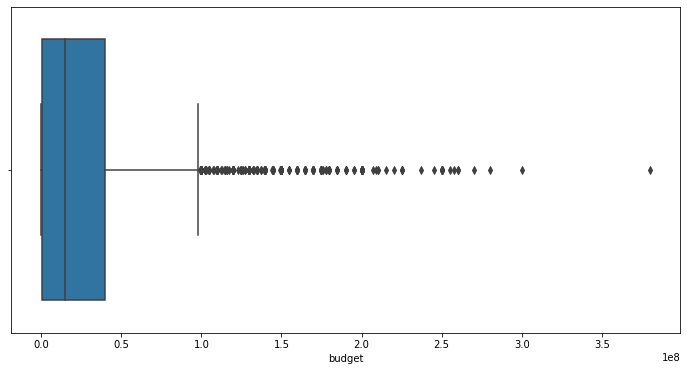

Boxplot Chart for popularity column


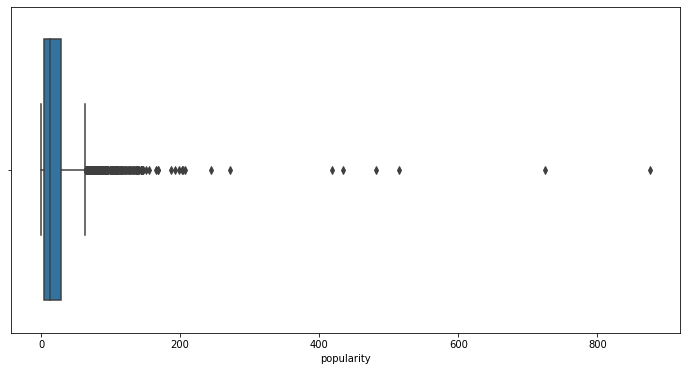

Boxplot Chart for revenue column


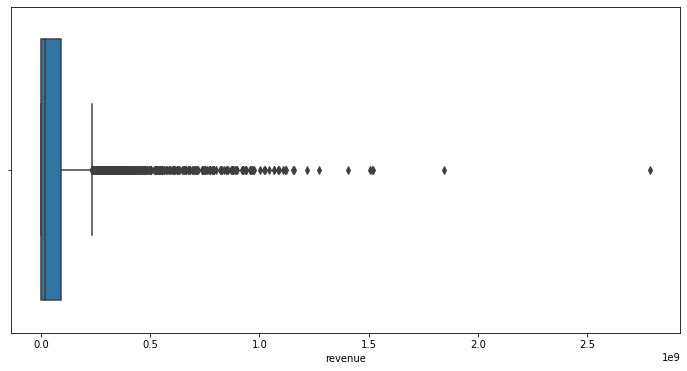

Boxplot Chart for runtime column


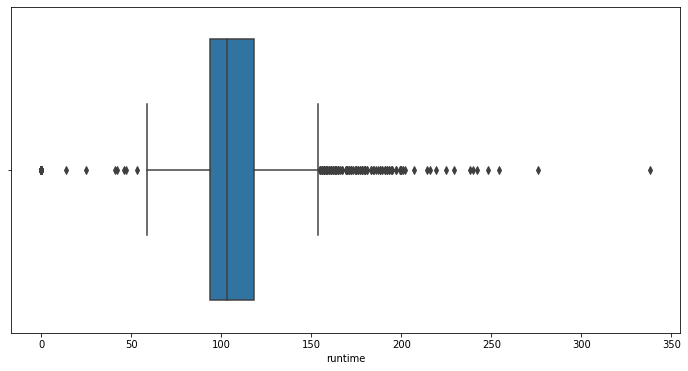

Boxplot Chart for vote_count column


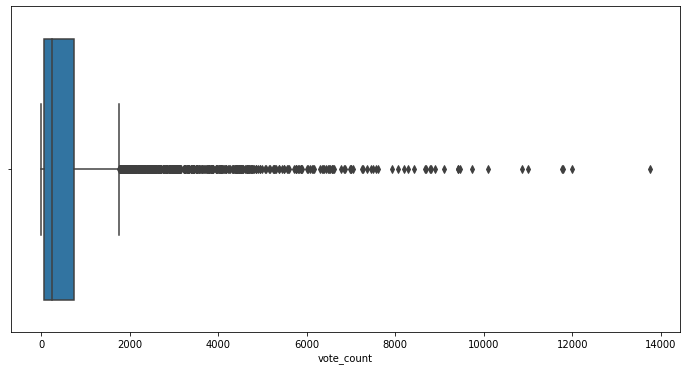

Boxplot Chart for Profit column


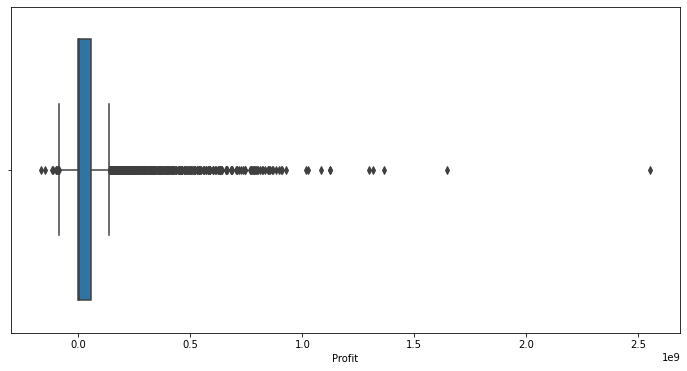

In [44]:
for col in num_cols.columns:
    val_cnt = num_cols[col].value_counts()
    print(f'Boxplot Chart for {col} column')
    plt.figure(figsize=(12,6))
    sns.boxplot(x=num_cols[col]);
    plt.show();

Histogram Chart for budget column


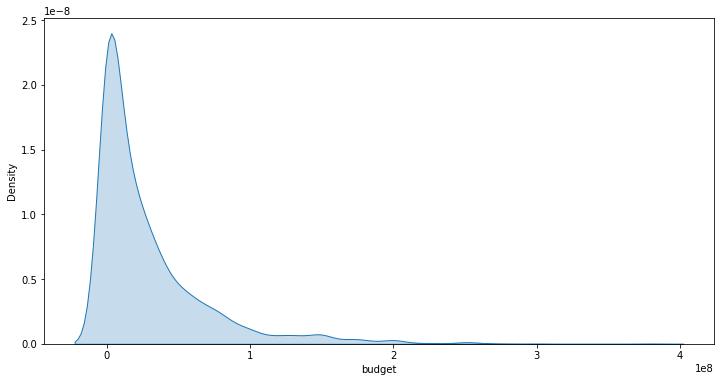

Histogram Chart for popularity column


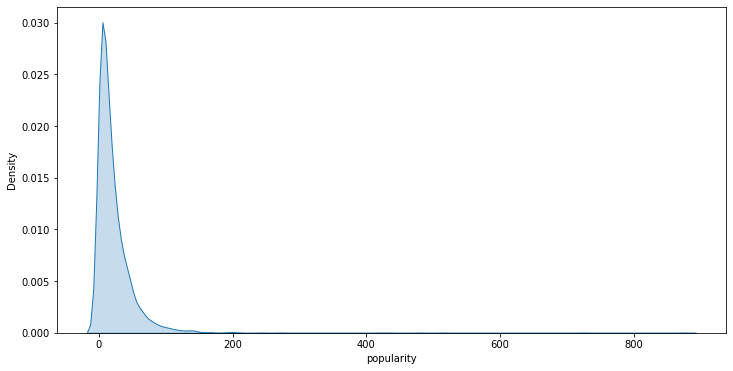

Histogram Chart for revenue column


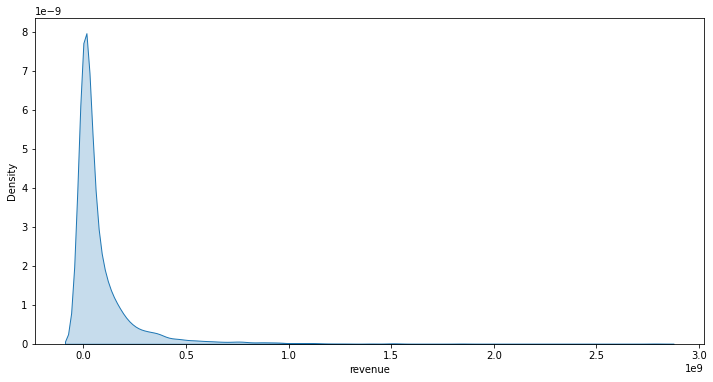

Histogram Chart for runtime column


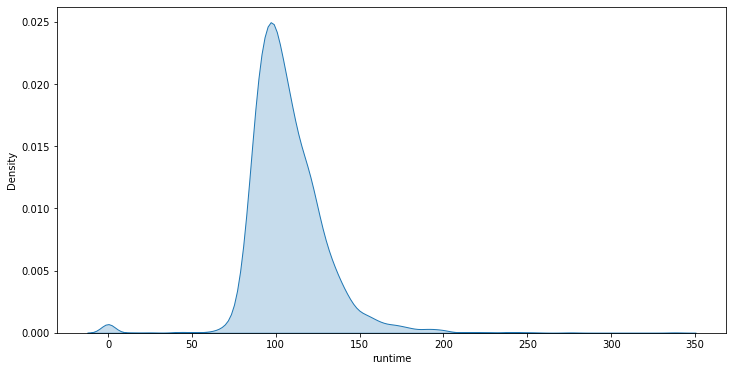

Histogram Chart for vote_count column


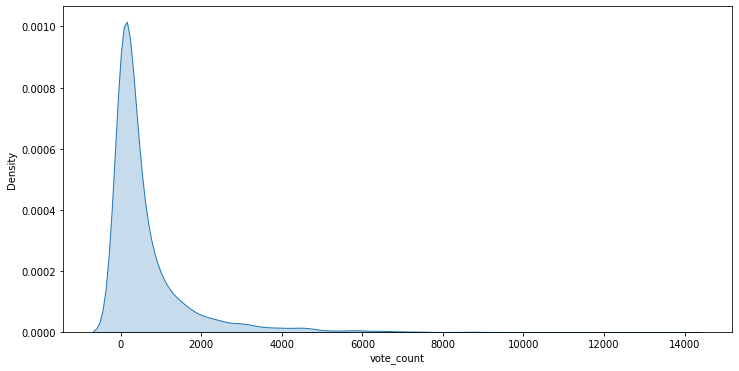

Histogram Chart for Profit column


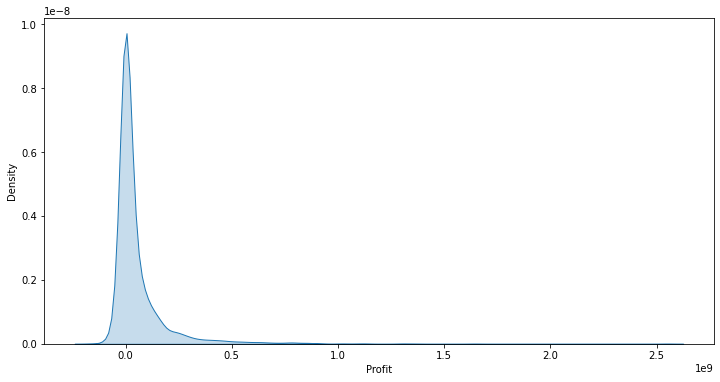

In [45]:
for col in num_cols.columns:
    val_cnt = num_cols[col].value_counts()
    print(f'Histogram Chart for {col} column')
    plt.figure(figsize=(12,6))
    sns.kdeplot(x=num_cols[col], shade=True);
    plt.show();

### How can we tell if a movie is profitable

In [ ]:
df['top_prod_comp'] = df['production_companies'].value_counts()[:5]

In [47]:
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'tagline', 'title', 'vote_count',
       'Profit'],
      dtype='object')